# Investigación de modelos ML

Se busca predecir de clientes que dejarán o se quedarán siendo clientes de nuestra empresa bancaria.

Trata de un problema de clasificación binaria.

Departamento de modelos

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

In [2]:
# Cargar los datos
data = pd.read_csv('data_selected.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13198 entries, 0 to 13197
Data columns (total 6 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  13198 non-null  float64
 1    Persistent EPS in the Last Four Seasons                  13198 non-null  float64
 2    Debt ratio %                                             13198 non-null  float64
 3    Net worth/Assets                                         13198 non-null  float64
 4    Net profit before tax/Paid-in capital                    13198 non-null  float64
 5   Bankrupt?                                                 13198 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 618.8 KB


In [3]:
data.head()

,ROA(C) before interest and depreciation before interest,Persistent EPS in the Last Four Seasons,Debt ratio %,Net worth/Assets,Net profit before tax/Paid-in capital,Bankrupt?
0,0.521620,0.234944,0.121928,0.878072,0.186555,0
1,0.437089,0.185024,0.207576,0.792424,0.147772,1
2,0.549798,0.256500,0.140067,0.859933,0.206960,0
3,0.446644,0.201853,0.153793,0.846207,0.160094,1
4,0.506021,0.231918,0.195090,0.804910,0.181977,1


#### Dividir variables 

In [4]:
# Dividir en features y target
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Entrenar Modelo

In [5]:
# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression(C=1.0, solver='saga', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='saga')

Predicciones

In [6]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

Evaluación del Modelo

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8583333333333333
ROC AUC Score: 0.9227640036730946
Confusion Matrix:
 [[1104  216]
 [ 158 1162]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      1320
           1       0.84      0.88      0.86      1320

    accuracy                           0.86      2640
   macro avg       0.86      0.86      0.86      2640
weighted avg       0.86      0.86      0.86      2640



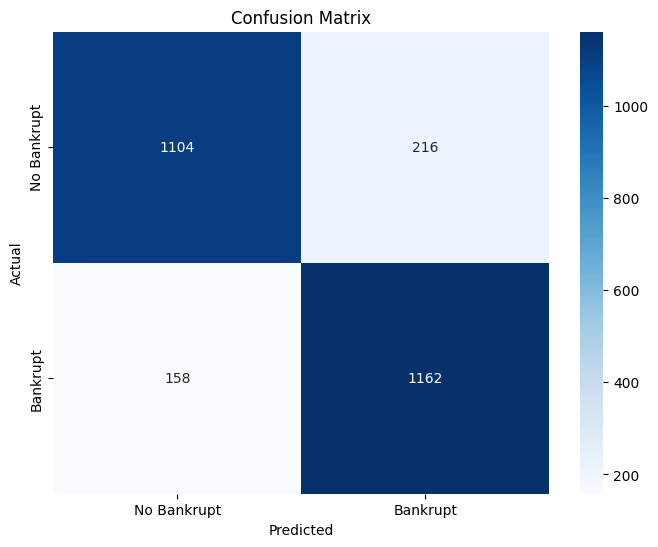

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Bankrupt', 'Bankrupt'], yticklabels=['No Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Empaque de Modelo

In [9]:
# Empaque el modelo
file = open('model.pkl', 'wb')
pickle.dump(model, file)
file.close()

Verificar que Funcione

In [20]:
# Revisar el modelo haciendo prueba con datos de prueba random del conjunto de entrenamiento

# Crear csv para probar modelo
test_data = pd.DataFrame(X_test, columns=X.columns)
test_data['Bankrupt?'] = y_test.values

test_data_sample = test_data.sample(n=6, random_state=9)  # Seleccionar 6 datos aleatorios
test_data_sample.to_csv('test_data.csv', index=False)

In [21]:
# Cargar el modelo
modelo = pickle.load(open('model.pkl', 'rb'))

# Cargar los datos de prueba
test_data = pd.read_csv('test_data.csv')

# Predicciones
predicciones = modelo.predict(test_data.drop('Bankrupt?', axis=1))

# Realidad
realidad = test_data['Bankrupt?'].values

# Comparar predicciones con la realidad
comparacion = pd.DataFrame({'Realidad': realidad, 'Predicciones': predicciones})
comparacion

,Realidad,Predicciones
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
5,1,1
